In [109]:
from mnist import MNIST
import numpy as np, scipy, seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [3]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1])
X_test  = np.array(TestData[0])
Y_test  = np.array(TestData[1])

the number shoud be 5


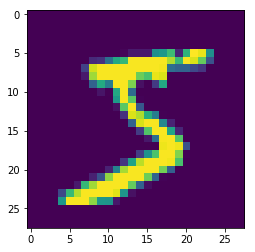

In [24]:
def Visualize(a):
    data = a.reshape((28, 28))
    imshow(data)
Visualize(X_train[0])
print "the number shoud be", Y_train[0]

In [5]:
X_std = StandardScaler().fit_transform(X_train)

C:\Users\wexleyz\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Test sklearn.decomposition.PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_std.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca_score = pca.explained_variance_ratio_
pca_score

array([ 0.04677605,  0.04143171,  0.0381674 ])

In [36]:
V = pca.components_
V.T[0]

array([-0.00116658, -0.00407262,  0.00028254])

Test SVD PCA

In [150]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=3)
print u.shape, s.shape, v.shape

(60000L, 3L) (3L,) (3L, 784L)


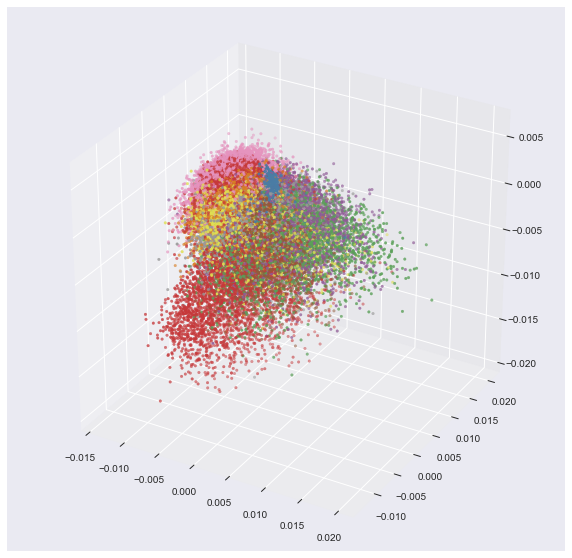

In [152]:
num = 30000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u.T[0][:num], u.T[1][:num], u.T[2][:num], \
           c=[sns.color_palette("Set1", n_colors=10, desat=.7)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

In [146]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=2)
print u.shape, s.shape, v.shape

(60000L, 2L) (2L,) (2L, 784L)


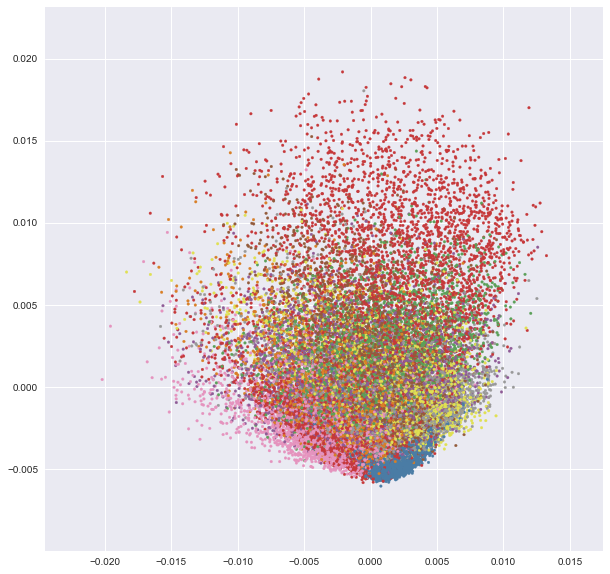

In [147]:
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(u.T[0][:num], u.T[1][:num], \
           c=[sns.color_palette("Set1", n_colors=10, desat=.7)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

    0      1      2      3      4      5      6      7      8      9


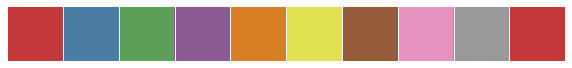

In [163]:
sns.palplot(sns.color_palette("Set1", n_colors=10, desat=.7))
print " "*4 + (" "*4).join(str(w) for w in xrange(10))